# Game of Thrones: Who spoke the most, and what?

I came across the Game of Thrones script for the first time in the final project of a Python course by Internshala. The idea for the project was to simply find unique words spoken by the characters. I, for one, wanted to explore some visualizations, and here is my attempt at one. We will find the character with the maximum number of lines in the script and create a word cloud. Fairly simple stuff.

> Who is the character with the maximum number of lines in the script, and what were the words they spoke the most?

## The Dataset

I found a GOT dataset in the public domain graciously delivered by Alben Tumanggor in Kaggle. We will be working with this dataset for our explorations. Here is the [link](https://www.kaggle.com/datasets/albenft/game-of-thrones-script-all-seasons) if you wanna explore it on your own.


Going over the headers for each column and what they correspond to will give us a good start. You can find a summary in the table.

| Header        | Description                                                | Example                                                                                                                                       |   |   |
|---------------|------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|---|---|
| Release Date  | The original air date of the episode in YYYY-MM-DD format. | 2011-04-17                                                                                                                                |   |   |
| Season        | The season number.                                         | Season 1                                                                                                                                  |   |   |
| Episode       | The episode number.                                        | Episode 1                                                                                                                                 |   |   |
| Episode Title | The title of the episode.                                  | Winter is Coming                                                                                                                          |   |   |
| Name          | Name of the GOT character.                                 | waymar royce                                                                                                                              |   |   |
| Sentence      | Sentence spoken by the character.                          | What do you expect? They're savages. One lot steals a goat from another lot and before you know it, they're ripping each other to pieces. |   |   |

Let us import the packages that we will use for the analysis.

In [1]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

Before we read the whole dataset, I feel more comfortable having a glimpse first. So we will read five rows from the dataset to get started.

In [2]:
input_file_path = '../input/game-of-thrones-script-all-seasons/Game_of_Thrones_Script.csv'
df = pd.read_csv(input_file_path,nrows=5)
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


We only require the columns `Name` and `Sentence` to address our problem statement. However, I am curious about finding efficient ways to read a dataset. Further, I do hope to extend the analysis with the other variables.

> Pandas use an enum-like structure for a [category](https://pandas.pydata.org/docs/user_guide/categorical.html), which allows saving on storage and computation. Well, it's more complicated than an enum, but the comparison helps my understanding. Similarly, the [string](https://pandas.pydata.org/docs/user_guide/text.html) datatype is a good choice when we wish to do string manipulations from within a data frame.

In [3]:
dtype = {'Episode Title' : 'category',
         'Name': 'category',
         'Sentence': 'string'}
df = pd.read_csv(input_file_path, parse_dates=['Release Date'], dtype=dtype,
                 converters={'Season': lambda x: int(re.sub('.*\D', '', x)),
                             'Episode': lambda x: int(re.sub('.*\D', '', x))}
                )
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,1,1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,1,1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,1,1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,1,1,Winter is Coming,will,Close as any man would.
4,2011-04-17,1,1,Winter is Coming,gared,We should head back to the wall.


In [4]:
df.isna().sum()

Release Date     0
Season           0
Episode          0
Episode Title    0
Name             3
Sentence         0
dtype: int64

Checking for null values in the data frame is always a good idea. And here, we find that the column Name has 3 null values. Let us look deeper into it.

In [5]:
df[df['Name'].isna()]

,Release Date,Season,Episode,Episode Title,Name,Sentence
17387,2016-05-01,6,2,Home,NaN,"You leave the fighting to the little lords, Wy..."
17389,2016-05-01,6,2,Home,NaN,"Well, he's never going to learn to fight becau..."
18619,2016-05-22,6,5,The Door,NaN,Wylis! What's the matter?


A quick search leads us to [Old Nan](https://gameofthrones.fandom.com/wiki/Old_Nan).

> Old Nan is an elderly woman living in Winterfell. She is a retired servant of House Stark known for her tale-telling abilities. She has entertained the children of Eddard and Catelyn with stories throughout their childhoods.

Old Nan is falsely parsed as null by pandas. Now we can't have that, can we? Let us fix it.

In [6]:
df.loc[:, 'Name'] = df.Name.cat.add_categories("Nan")
df.loc[:, 'Name'].fillna("Nan", inplace=True)

In [7]:
df.dtypes

Release Date     datetime64[ns]
Season                    int64
Episode                   int64
Episode Title          category
Name                   category
Sentence                 string
dtype: object

## Doing the Analysis

### Who spoke the most?

We can quickly find the top 10 characters according to the number of lines they had in the complete series.

In [8]:
top_10 = df[['Name']].value_counts().head(10).reset_index()
top_10

,Name,0
0,tyrion lannister,1760
1,jon snow,1133
2,daenerys targaryen,1048
3,cersei lannister,1005
4,jaime lannister,945
5,sansa stark,784
6,arya stark,783
7,davos,528
8,theon greyjoy,455
9,petyr baelish,449


Tyrion Lannister rocks the top, followed by Jon Snow. Let us make a quick plot for our satisfaction.

<AxesSubplot:title={'center':'Top 10 Characters with lines'}, ylabel='Character'>

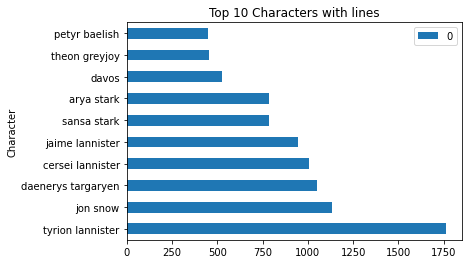

In [9]:
top_10.plot(x='Name',kind='barh', title='Top 10 Characters with lines',
            xlabel='Character', ylabel='No. of Lines'
           )

We have our guy. Now comes the question,

### What words did he speak the most?

We will extract Tyrion's lines to a different data frame.

In [10]:
tyrion_lannister = df.loc[df.Name=='tyrion lannister','Sentence']

We will do some quick string manipulations to split the lines into words.

In [11]:
tyrion_lannister = tyrion_lannister. \
        str.replace('[,.?!-]','', regex=True). \
        str.lower(). \
        str.split()
tyrion_lannister.head()

145    [mmh, it, is, true, what, they, say, about, th...
147               [i, did, hear, something, about, that]
149                           [and, the, other, brother]
151    [there's, the, pretty, one, and, there's, the,...
153                 [i, hear, he, hates, that, nickname]
Name: Sentence, dtype: object

We have a list under `Sentence` after splitting. A list is not so lovely inside a data frame. So let us explode it into long-form data.

In [12]:
tyrion_lannister = tyrion_lannister.explode('Sentence')

In [13]:
tyrion_lannister.value_counts().head(10)

the    1094
you     864
i       772
to      771
a       605
of      513
and     435
my      307
it      290
me      276
Name: Sentence, dtype: int64

Oh my, the top spoken words are all [stop words](https://www.opinosis-analytics.com/knowledge-base/stop-words-explained/). To give a quick rundown, stop words make sense in a sentence but are nonsensical without context. Since we are looking at individual words, it is safe to remove them.

I have tried four libraries-`wordcloud`, `Scikit-Learn`, `Natural Language Toolkit (NLTK)`, and `spaCy`. I liked the output from `wordcloud` the best. So we will just go ahead with it.

In [14]:
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
tyrion_lannister = tyrion_lannister[~tyrion_lannister.isin(sw_nltk)]

In [15]:
tyrion_lannister.value_counts().head(10)

i'm       130
know      109
one       100
would      89
father     83
like       77
well       73
want       72
good       66
yes        58
Name: Sentence, dtype: int64

Now that is a lot better.

In [16]:
from wordcloud import WordCloud, STOPWORDS
tyrion_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=STOPWORDS
)

In [17]:
tyrion_wc.generate(' '.join(tyrion_lannister.values))

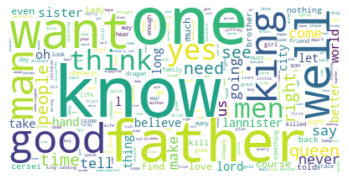

In [18]:
plt.imshow(tyrion_wc, interpolation='bilinear')
plt.axis('off')
plt.show()